###                                                     Campus Pulse

Importing libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use("dark_background")
import shap 

Importing dataset

In [3]:
df = pd.read_csv('./Dataset.csv')
eda = pd.read_csv('./Dataset.csv')

Understanding the dataset

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   address     649 non-null    object 
 3   famsize     599 non-null    object 
 4   Pstatus     649 non-null    object 
 5   Medu        649 non-null    int64  
 6   Fedu        576 non-null    float64
 7   Mjob        649 non-null    object 
 8   Fjob        649 non-null    object 
 9   reason      649 non-null    object 
 10  guardian    649 non-null    object 
 11  traveltime  576 non-null    float64
 12  failures    649 non-null    int64  
 13  schoolsup   649 non-null    object 
 14  famsup      649 non-null    object 
 15  paid        649 non-null    object 
 16  activities  649 non-null    object 
 17  nursery     649 non-null    object 
 18  higher      573 non-null    object 
 19  internet    649 non-null    o

,Medu,Fedu,traveltime,failures,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3
count,649.000000,576.000000,576.000000,649.000000,649.000000,604.000000,649.000000,649.000000,649.000000,580.000000,649.000000,614.000000,649.000000,611.000000,603.000000,610.000000
mean,2.514638,2.303819,1.574653,0.221880,3.930663,3.172185,3.184900,1.502311,3.536210,3.746552,11.399076,11.586319,11.906009,16.747954,1.913765,2.262295
std,1.134552,1.111076,0.744592,0.593235,0.955717,1.044684,1.175766,0.924834,1.446259,4.732890,2.745265,2.927878,3.230656,1.216812,0.830798,1.285279
min,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,16.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,4.000000,2.000000,11.000000,11.000000,12.000000,17.000000,2.000000,2.000000
75%,4.000000,3.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,5.000000,6.000000,13.000000,13.000000,14.000000,18.000000,2.000000,3.000000
max,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,22.000000,4.000000,5.000000


# Level - 1 (Variable Identification Protocol)

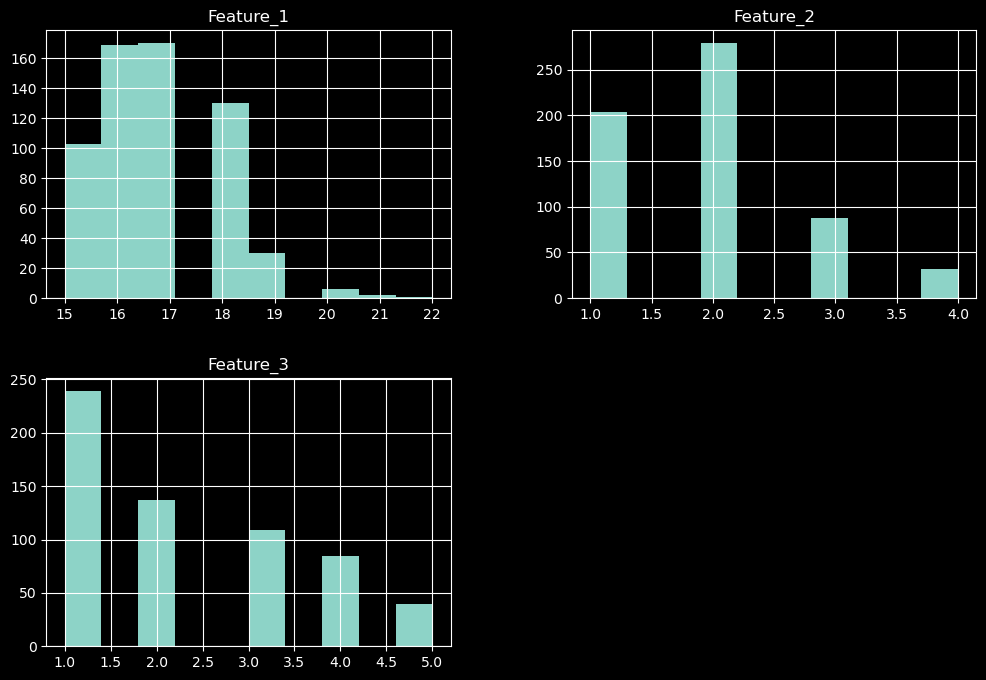

In [5]:
df[['Feature_1', 'Feature_2', 'Feature_3']].hist(figsize = (12,8))
plt.show()

<Axes: title={'center': 'Correlation Table'}>

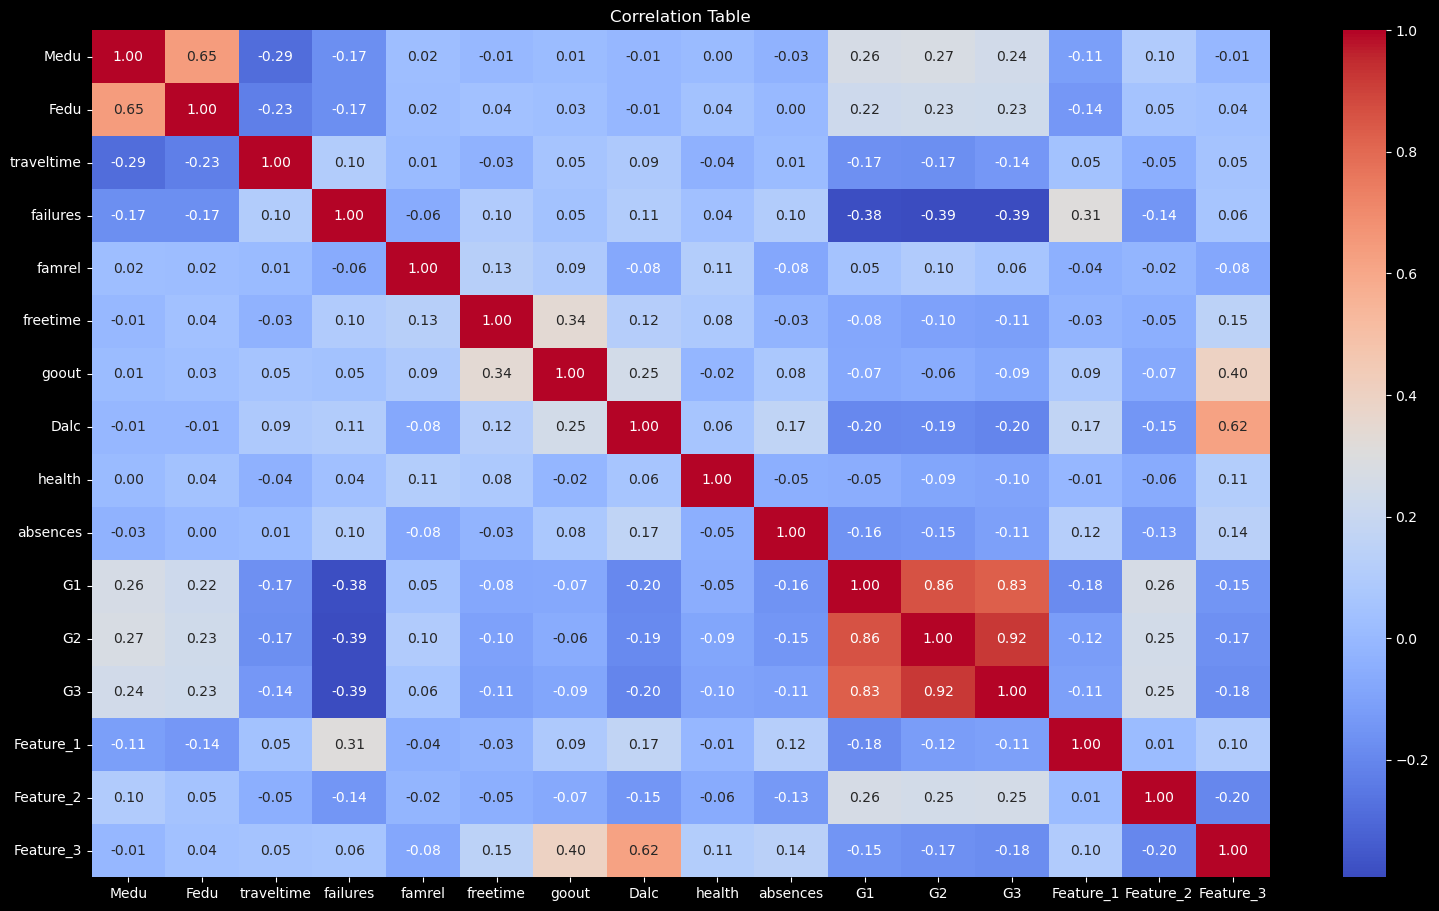

In [6]:
eda_numeric = eda.select_dtypes(include = ['number'])
plt.figure(figsize = (19,11))
plt.title("Correlation Table")
sns.heatmap(eda_numeric.corr(),cmap = 'coolwarm' , annot = True , fmt = ".2f")

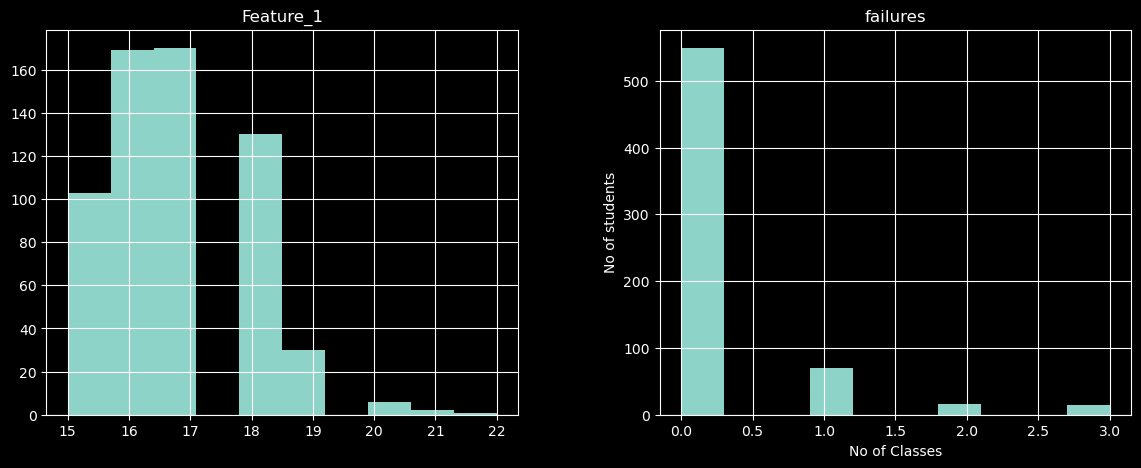

In [7]:
eda[['Feature_1', 'failures']].hist(figsize = (14,5))
plt.xlabel("No of Classes")
plt.ylabel("No of students")
plt.show()

Feature_1 is highly correalated to Dalc So it maybe indicating student's choice of age to start drinking .

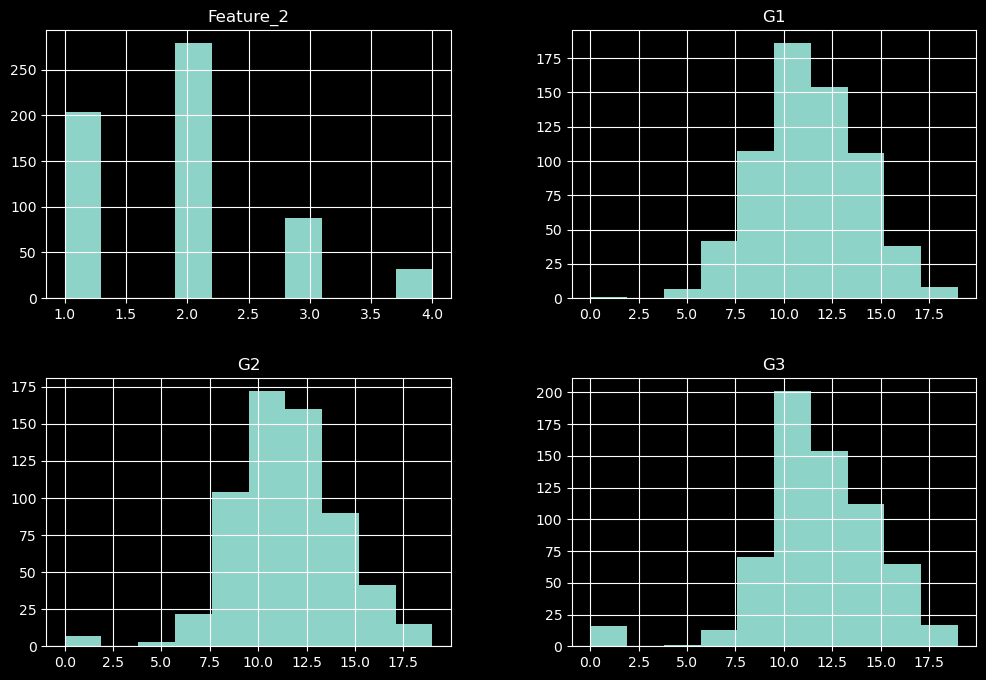

In [8]:
eda[['Feature_2', 'G1', 'G2', 'G3']].hist(figsize = (12,8))
plt.show()

Feature_2 is highly correalated to grades So it maybe indicating the number of studytime in intervals(for ex: 1 :<30min,2:<1hour and so on) .

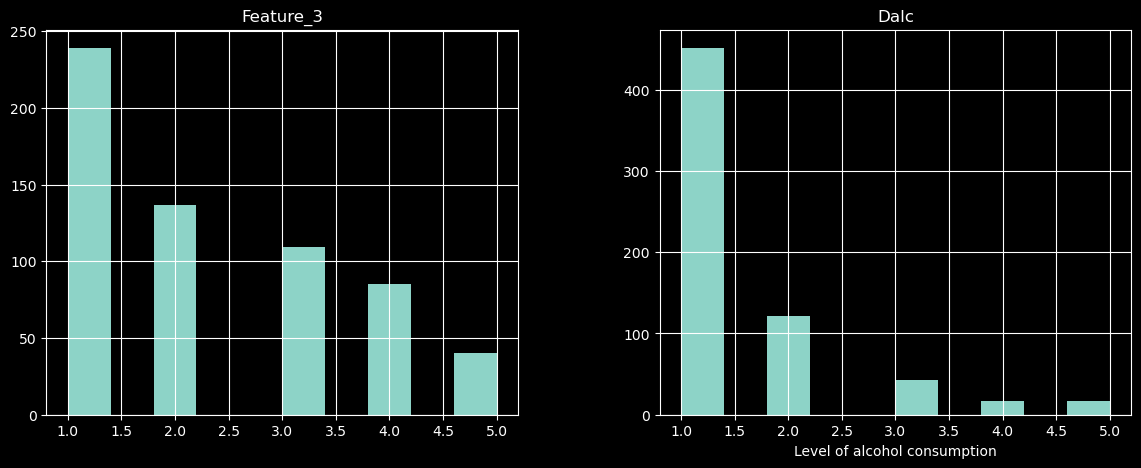

In [9]:
eda[['Feature_3', 'Dalc']].hist(figsize = (14,5))
plt.xlabel("Level of alcohol consumption")
plt.show()

Feature_3 highly correlated to Dalc So it maybe indicating stress levels of students 

# Level -2 (Data Integrity Audit)

In [10]:
df["Fedu"]=df["Fedu"].fillna(df["Fedu"].mean())
df["traveltime"] = df["traveltime"].fillna(df["traveltime"].mean())
df["absences"] = df["absences"].fillna(df["absences"].mean())
df["freetime"] = df["freetime"].fillna(df["freetime"].mean())
df["G2"] = df["G2"].fillna(df["G2"].mean())
df["Feature_1"]=df["Feature_1"].fillna(df["Feature_1"].mean())
df["Feature_2"]=df["Feature_2"].fillna(df["Feature_2"].mean())
df["Feature_3"]=df["Feature_3"].fillna(df["Feature_3"].mean())
# Filled all the columns with mean value of the column .
df["higher"] = df["higher"].fillna("yes")#because most students opted for yes
df["famsize"] = df["famsize"].fillna("GT3")#because most students opted for GT3

In [11]:
lower_limit  = np.percentile(df["absences"],1)
upper_limit = np.percentile(df["absences"],99)
df["absences"] = np.clip(df["absences"],lower_limit,upper_limit)
# we are cliping the absences column because it have extreme outliner which can effect the process

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

def encoding(col) :
    df[col] = le.fit_transform(df[col])
    return df[col]

df_object = df.select_dtypes(include = ['object'])
for column in df_object:
    df[column] = encoding(column)

#Encoding all the object columns

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['G1','G2','G3']] = scaler.fit_transform(df[['G1','G2','G3']])

#Scaling the Grade columns

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['absences']] = scaler.fit_transform(df[['absences']])

#Scaling the absences column

# Level - 3 (Exploratory Insight Report)

### Question - 1 . How do absences impact final grades(G3) ?

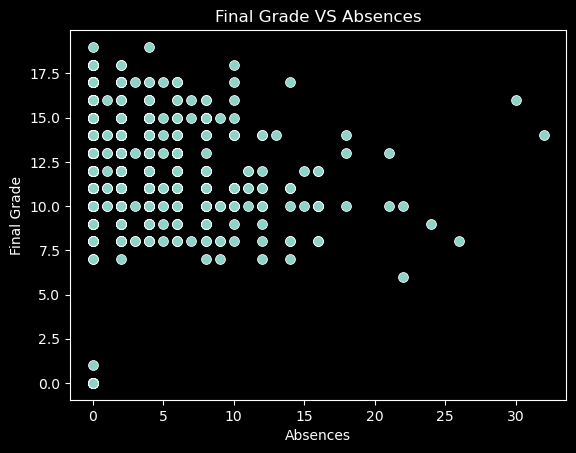

In [15]:
sns.scatterplot(x=eda['absences'],y=eda['G3'],s=50)
plt.title("Final Grade VS Absences")
plt.xlabel("Absences")
plt.ylabel("Final Grade")
plt.show()

In [16]:
df[['absences','G3']].corr()

,absences,G3
absences,1.000000,-0.106205
G3,-0.106205,1.000000


So we can conclude that higher absences will results in less grades .

### Question - 2 . Do students in romantic relationship have different  study and sleep pattern ?

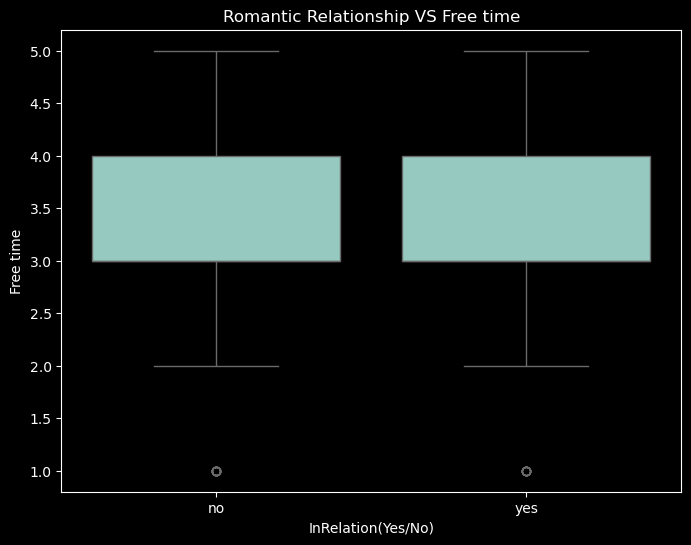

In [17]:
plt.figure(figsize = (8,6))
sns.boxplot(x=eda["romantic"],y = df["freetime"])
plt.title("Romantic Relationship VS Free time")
plt.xlabel("InRelation(Yes/No)")
plt.ylabel("Free time")
plt.show()

In [18]:
df[['romantic','freetime']].corr()

,romantic,freetime
romantic,1.00000,0.01624
freetime,0.01624,1.00000


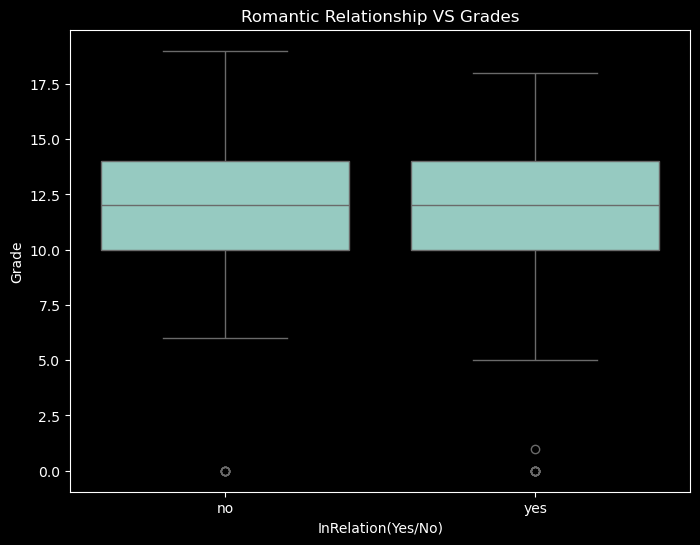

In [19]:
plt.figure(figsize = (8,6))
sns.boxplot(x=eda["romantic"],y = eda["G3"])
plt.title("Romantic Relationship VS Grades")
plt.xlabel("InRelation(Yes/No)")
plt.ylabel("Grade")
plt.show()

In [20]:
print(df[['romantic','G3']].corr())
print(df[['romantic','G2']].corr())
print(df[['romantic','G1']].corr())

          romantic        G3
romantic  1.000000 -0.090583
G3       -0.090583  1.000000
          romantic        G2
romantic  1.000000 -0.105365
G2       -0.105365  1.000000
          romantic        G1
romantic  1.000000 -0.074973
G1       -0.074973  1.000000


So we can conclude that students who are in relationship have more free time but also have less grades.

### Question - 3 . Do students from Urban (U) and rural(R) areas show differnent level of invlovement in extra-curricular activities?

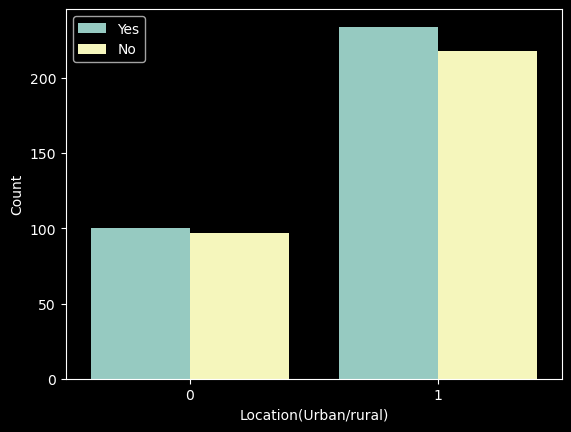

In [21]:
sns.countplot(x = "address", hue ="activities",data =df)
plt.xlabel("Location(Urban/rural)")
plt.ylabel("Count")
plt.legend(["Yes","No"])
plt.show()

In [22]:
df[['address','activities']].corr()

,address,activities
address,1.000000,-0.009278
activities,-0.009278,1.000000


So we can conclude that students from both backgrounds are likely to be part of extra-circular activities.

### Question - 4 . Does internet access influence romantic relationships ?

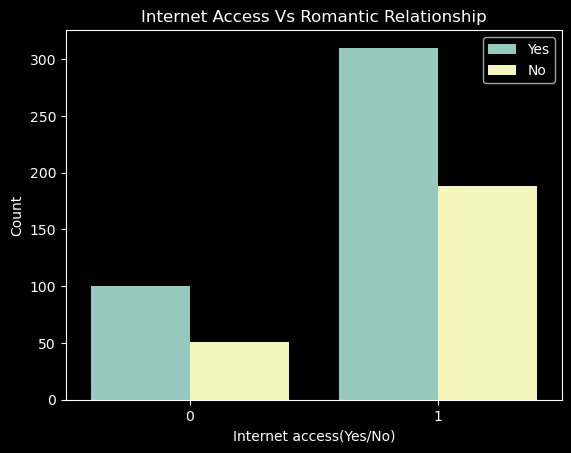

In [23]:
sns.countplot(x = df["internet"], hue = df["romantic"], data = df)
plt.title("Internet Access Vs Romantic Relationship")
plt.xlabel("Internet access(Yes/No)")
plt.ylabel("Count")
plt.legend(["Yes","No"])
plt.show()

In [24]:
df[['romantic','internet']].corr()

,romantic,internet
romantic,1.000000,0.034832
internet,0.034832,1.000000


So we can conclude that internet have influence on relationship.

### Question - 5 . How Family Relations affect grades ?

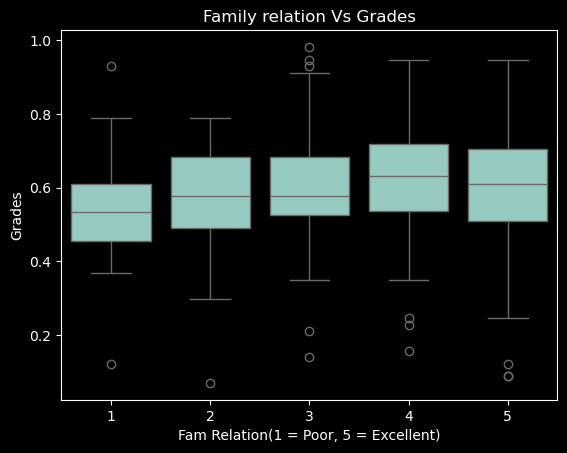

In [25]:
df["avg_grades"] = df[["G1","G2","G3"]].mean(axis = 1)
sns.boxplot(x = df["famrel"] , y = df["avg_grades"])
plt.title("Family relation Vs Grades")
plt.xlabel("Fam Relation(1 = Poor, 5 = Excellent)")
plt.ylabel("Grades")
plt.show()

In [26]:
df[['famrel','avg_grades']].corr()

,famrel,avg_grades
famrel,1.000000,0.074289
avg_grades,0.074289,1.000000


So that we can conclude that family relations affect grade positively.

# Level - 4 (Relationship Prediction Model)

In [56]:
from sklearn.model_selection import train_test_split
x = df.drop("romantic", axis = 1)
xd = x.drop(columns = ['G1','G3','G2'])
xd["avg_grade"] = x[['G1','G3','G2']].mean(axis = 1)
y = df["romantic"]

x_train, x_test, y_train, y_test = train_test_split(xd,y,test_size = 0.2,random_state = 42)

#spliting the data into test and train sets

In [28]:
#dropped G1 G2 G3 and added avg_grades

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf) * 100)

Random Forest Accuracy: 57.692307692307686


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


log_model = LogisticRegression(max_iter=500)
log_model.fit(x_train,y_train)

y_pred_log = log_model.predict(x_test)

print("Logistic Regression Accuracy:",accuracy_score(y_test,y_pred_log)* 100)

#implementing logisticregression model on dataset.

Logistic Regression Accuracy: 59.23076923076923


# Level - 5(Model Reasoning & Interpretation)

Visualizing decision boundaries using 2D feature pairs

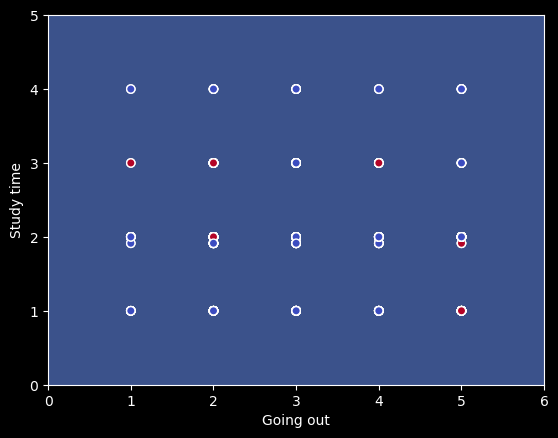

In [30]:
from sklearn.inspection import DecisionBoundaryDisplay

x_selected = x_train[["goout","Feature_2"]]
log_model.fit(x_selected, y_train)
DecisionBoundaryDisplay.from_estimator(log_model , x_selected, response_method = "predict")

plt.scatter(x_selected.iloc[:,0], x_selected.iloc[:,1] , c = y_train, cmap = "coolwarm" ,edgecolors = "w")
plt.xlabel("Going out")
plt.ylabel("Study time")

plt.show()

Ploting global feature importance

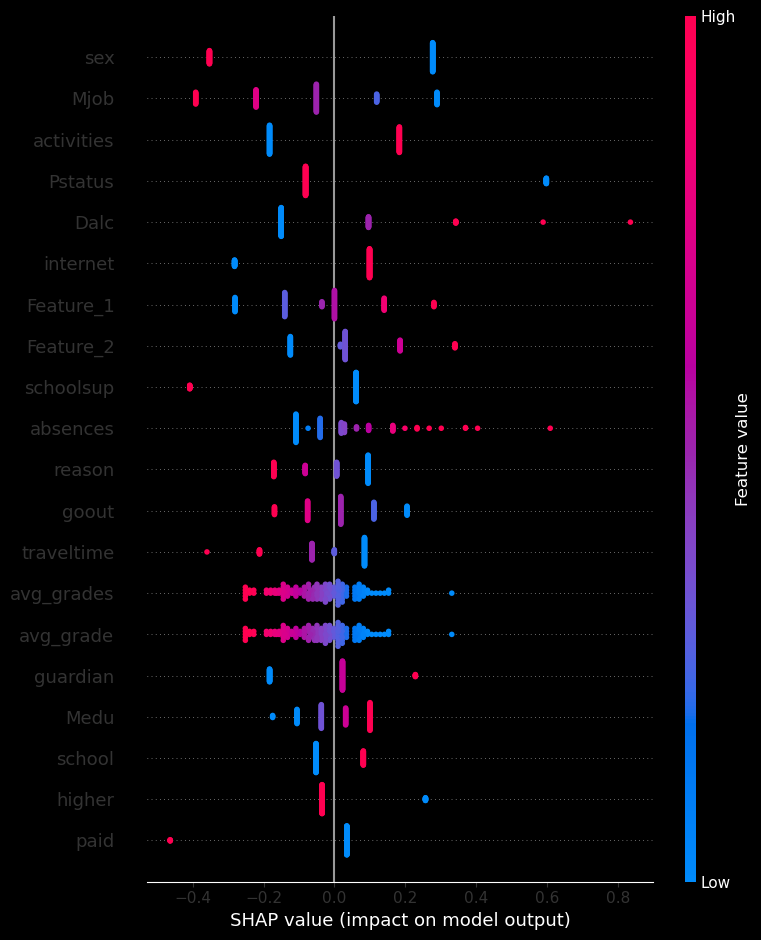

In [51]:
explainer = shap.Explainer(log_model, x_train)
shap_values = explainer(x_test)

shap.summary_plot(shap_values)

Generating local explanations for two students one predicted “Yes” and one “No.

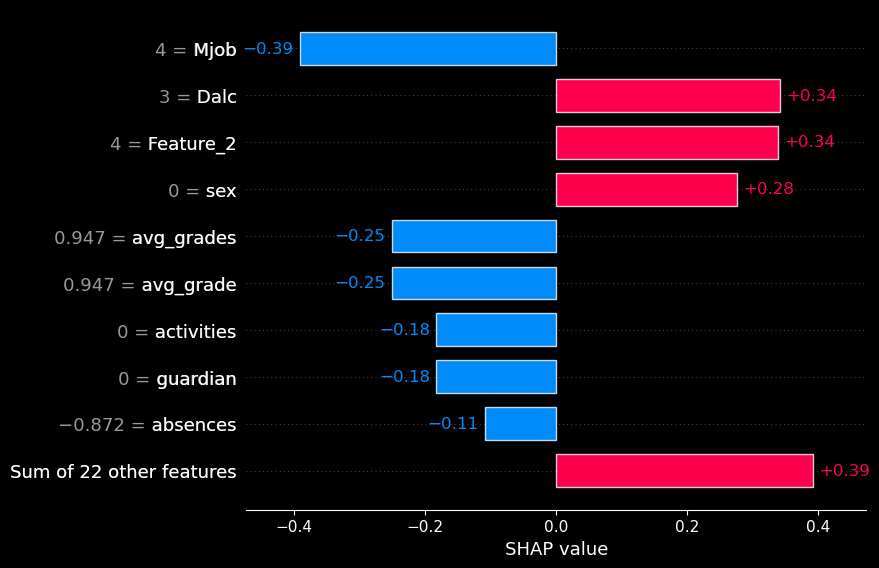

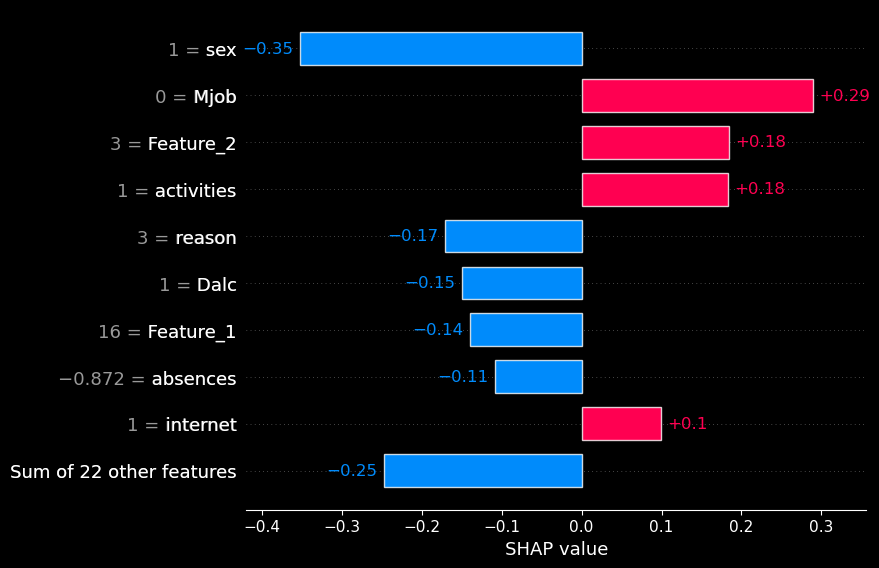

In [52]:
shap.plots.bar(shap_values[10]) #random selected studtent to be YES
shap.plots.bar(shap_values[12]) #random selected studtent to be NO

Interpreting the results in plain language

1. Students who involed in social activities tends have a relationship.
2. students for good family relationship tends to have relationship due to strong emotional damage.
3. Students who are good tend have less chance of relationship because of the academic pressure and less freetime .
